##### Objective: Predict whether a person will be diagnosed with diabetes or not using KNN

We have a dataset of 768 people who were or were not diagnosed with diabetes

About the data

•	Pregnancies: Number of times pregnant

•	Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

•	BloodPressure: Diastolic blood pressure (mm Hg)

•	SkinThickness: Triceps skin fold thickness (mm)

•	Insulin: 2-Hour serum insulin (mu U/ml)

•	BMI: Body mass index (weight in kg/(height in m)^2)

•	DiabetesPedigreeFunction: Diabetes pedigree function

•	Age: Age (years)

•	Outcome: Class variable (0 or 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from collections import Counter
# operating system
import os
os.getcwd()

'C:\\Users\\ISAAC'

### Load dataset

In [3]:
# Reading data from excel  
dataset=pd.read_excel("diabetes_dataset.xlsx")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Replace zeros
Values of columns like 'Glucose', 'BloodPressure' cannot be accepted as zero because it will affect the outcome.
we can replace such values with the mean of the respective column

In [4]:
###  Replace zeros
zero_not_accepted= ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0, np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN, mean)

In [5]:
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    155.0  33.6   
1              1     85.0           66.0           29.0    155.0  26.6   
2              8    183.0           64.0           29.0    155.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    155.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    155.0  30.1   
767            1     93.0           70.0           31.0    155.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
# Checking missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
# Checking missing values
dataset.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


In [9]:
# define the features and the target

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
#================split X and y into training and test set in 80:20 ratio==============================#

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=1) 

#### Feature Scaling or Data Standardization
Rule of thumb: Any algorithm that compute distance or assumes normality, features must be scaled

In [13]:
# Feature scaling
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [14]:
print("X train before Normalization")
print (X[0:5])

print("\nX train after Normalization")
print(X_train[0:5])

X train before Normalization
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   
1            1     85.0           66.0           29.0    155.0  26.6   
2            8    183.0           64.0           29.0    155.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

X train after Normalization
[[ 1.51659096  0.75975018  0.62370402  1.99810305 -0.30625102  0.83679466
   0.52952571  0.56793202]
 [ 1.81201827  0.23468611 -0.82718565  0.83357028 -0.01495389  1.32101952
  -0.06968859  0.39844951]
 [ 0.92573636 -0.65135951  0.14007413  1.29938339 -0.59754816  0.7340803
  -0.79424873  0.9916382

In [15]:
print(X_test)

[[ 0.92573636  0.46440164  0.14007413 ... -0.90934953  0.56009786
   1.50008581]
 [-0.84682744  0.95664921 -0.98839562 ... -0.89467605 -0.87067912
  -0.95741055]
 [ 0.63030906 -0.42164398 -0.98839562 ... -1.05608433 -0.78813429
  -0.53370428]
 ...
 [ 1.22116366  2.17085988  0.46249406 ...  2.30414272 -0.99908218
   0.82215578]
 [ 0.33488176  0.46440164  0.78491399 ... -0.02894069  0.53869735
   3.02542839]
 [ 0.03945446 -1.04515757 -0.02113583 ... -0.61587991  0.44698088
  -0.19473927]]


##### Defining the model using KneighborsClassifier and fit the train data in the model

N_neighbors here is 'K'

p is the power parameter to define the metric used, which is 'Eclidean' in our case

In [16]:
# Calculating K
import math
math.sqrt(len(y_test))

12.409673645990857

since 12 is an even number, we need to subratct one from 12, then we have K=12-1=11

Thus, n_neighbors is 11 (odd of K is selected to avoid confusion between two classes of data)

while p is 2

In [17]:
# Define the model: Init K-NN
classifier=KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [18]:
# Fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [19]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [20]:
# Evaluate model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy: how often is the classifier correct?
print("Accuracy on Test Set:", metrics.accuracy_score(y_test, y_pred))

Accuracy on Test Set: 0.7792207792207793


In [21]:
# Well, a classification rate of 78.0% is considered  to be a very good accuracy, and it indicates that 78% of our predictions are correct.

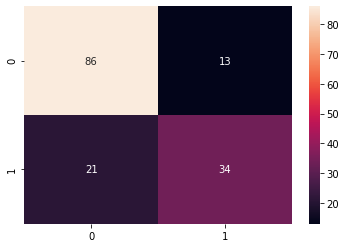

In [22]:
# Confusion Matrix
ConfusionMatrix=confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(ConfusionMatrix, annot=True)
plt.savefig('confusion.png')

#### F1 Score
F1-score is one of the most important evaluation metrics in machine learning. It sums up the predictive performance of a model
by combining two otherwise competing metrics - precision and recall



In [23]:
#Model Accuracy: how often is the classifier correct?
print("F1_Score on Test Set:", metrics.f1_score(y_test, y_pred))

F1_Score on Test Set: 0.6666666666666667


In [24]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn import metrics

In [25]:
print(classification_report(y_test,y_pred))
print("Accuracy on test set:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Accuracy on test set: 0.7792207792207793


In [26]:
#### PREDICTIVE SYSTEM

In [27]:
# making a predictive system 

input_data=(5, 121.0, 72.0, 23.0, 112.0, 26.2, 0.245, 30)


# changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting one instance
#========================================================================================================================#
# (1,-1) It simply means that it is an unknown dimension and we want numpy to figure it out.                             #
# And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it         #
# satisfies the above mentioned criteria. In a nut shell, (1,-1) means an unknown dimension that the reshape () function #
# calculates for you.                                                                                                    #
#========================================================================================================================#
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data=sc_X.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)

print(prediction)
if (prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.33488176 -0.02784593 -0.02113583 -0.68032232 -0.51598496 -0.88000256
  -0.66890288 -0.27948052]]
[0]
The person is not diabetic
